# Bank Marketing Dataset


During my journey as a Math student I decided that I should finally try to prepare some data connected projects as I'm also interested in stock market and so on I tried a bit to build some models in this area but it is a bit too challanging for me at the moment so I decided to try prepare a bit simpler project on one of classic dataset. 

## About Dataset
This dataset is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit. It includes features like age, job, marital status, education, and the campaign outcome. This might be very helpful in better targeting marketing campaigns. 

Let's start with loading this dataset and checking with what data we are going to deal 

In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px 
import plotly.graph_objs as go
from plotly.offline import iplot


warnings.filterwarnings('ignore')


In [60]:

df = pd.read_csv("data/bank.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Columns included in this dataset: <br>
age: Age of the customer. <br>
job: Job role of the customer. \<br>
marital: Marital status of the customer. <br>
education: Education level of the customer. <br>
default: Indicates if the customer has credit in default.<br>
balance: Account balance of the customer.<br>
housing: Indicates if the customer has a housing loan.<br>
loan: Indicates if the customer has a personal loan.<br>
contact: Type of communication contact.<br>
day: Last contact day of the month.<br>
month: Last contact month of the year.<br>
duration: Last contact duration, in seconds.<br>
campaign: Number of contacts performed during this campaign for this client.<br>
pdays: Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted).<br>
previous: number of contacts performed before this campaign and for this client <br>
poutcome: Outcome of the previous marketing campaign.<br>
deposit: Indicates if the client subscribed to a term deposit.

In [61]:
# to start with we will look at summary for numerical variables
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [62]:
categorical_columns = [col for col in df.columns if df[col].dtype=="O"]

categorical_summary = {column: df[column].value_counts() for column in categorical_columns}
categorical_summary

{'job': job
 management       2566
 blue-collar      1944
 technician       1823
 admin.           1334
 services          923
 retired           778
 self-employed     405
 student           360
 unemployed        357
 entrepreneur      328
 housemaid         274
 unknown            70
 Name: count, dtype: int64,
 'marital': marital
 married     6351
 single      3518
 divorced    1293
 Name: count, dtype: int64,
 'education': education
 secondary    5476
 tertiary     3689
 primary      1500
 unknown       497
 Name: count, dtype: int64,
 'default': default
 no     10994
 yes      168
 Name: count, dtype: int64,
 'housing': housing
 no     5881
 yes    5281
 Name: count, dtype: int64,
 'loan': loan
 no     9702
 yes    1460
 Name: count, dtype: int64,
 'contact': contact
 cellular     8042
 unknown      2346
 telephone     774
 Name: count, dtype: int64,
 'month': month
 may    2824
 aug    1519
 jul    1514
 jun    1222
 nov     943
 apr     923
 feb     776
 oct     392
 jan     34

First impressions:
- it seems we're dealing with really fine dataset it's complete(no missing data), well balanced(very similar number of clients in both categories(ones who deposited and ones who didn't))
- variable 'poutcome' might potentially be a bit problematic because over 8000 times it's 'unknown'
- definietly good thing is that we have 0 NaN (missing data)
- also it's worth to note that in data description we can see a recommendation that column duration should be dropped as it's highly correlated with target variable because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client. Also this variable is only useful when at least one succesful contact with client was made. 

To begin with let's compare catregorical variables distribution for people who deposited money(or not)

In [63]:
# Calculating the percentage of customers who subscribed to a term deposit within each job category
job_deposit_pct = df.groupby('job')['deposit'].value_counts(normalize=True)*100
job_deposit_pct

job            deposit
admin.         no         52.698651
               yes        47.301349
blue-collar    no         63.580247
               yes        36.419753
entrepreneur   no         62.500000
               yes        37.500000
housemaid      no         60.218978
               yes        39.781022
management     yes        50.701481
               no         49.298519
retired        yes        66.323907
               no         33.676093
self-employed  no         53.827160
               yes        46.172840
services       no         60.021668
               yes        39.978332
student        yes        74.722222
               no         25.277778
technician     no         53.922106
               yes        46.077894
unemployed     yes        56.582633
               no         43.417367
unknown        no         51.428571
               yes        48.571429
Name: proportion, dtype: float64

distribution of numerical variables 

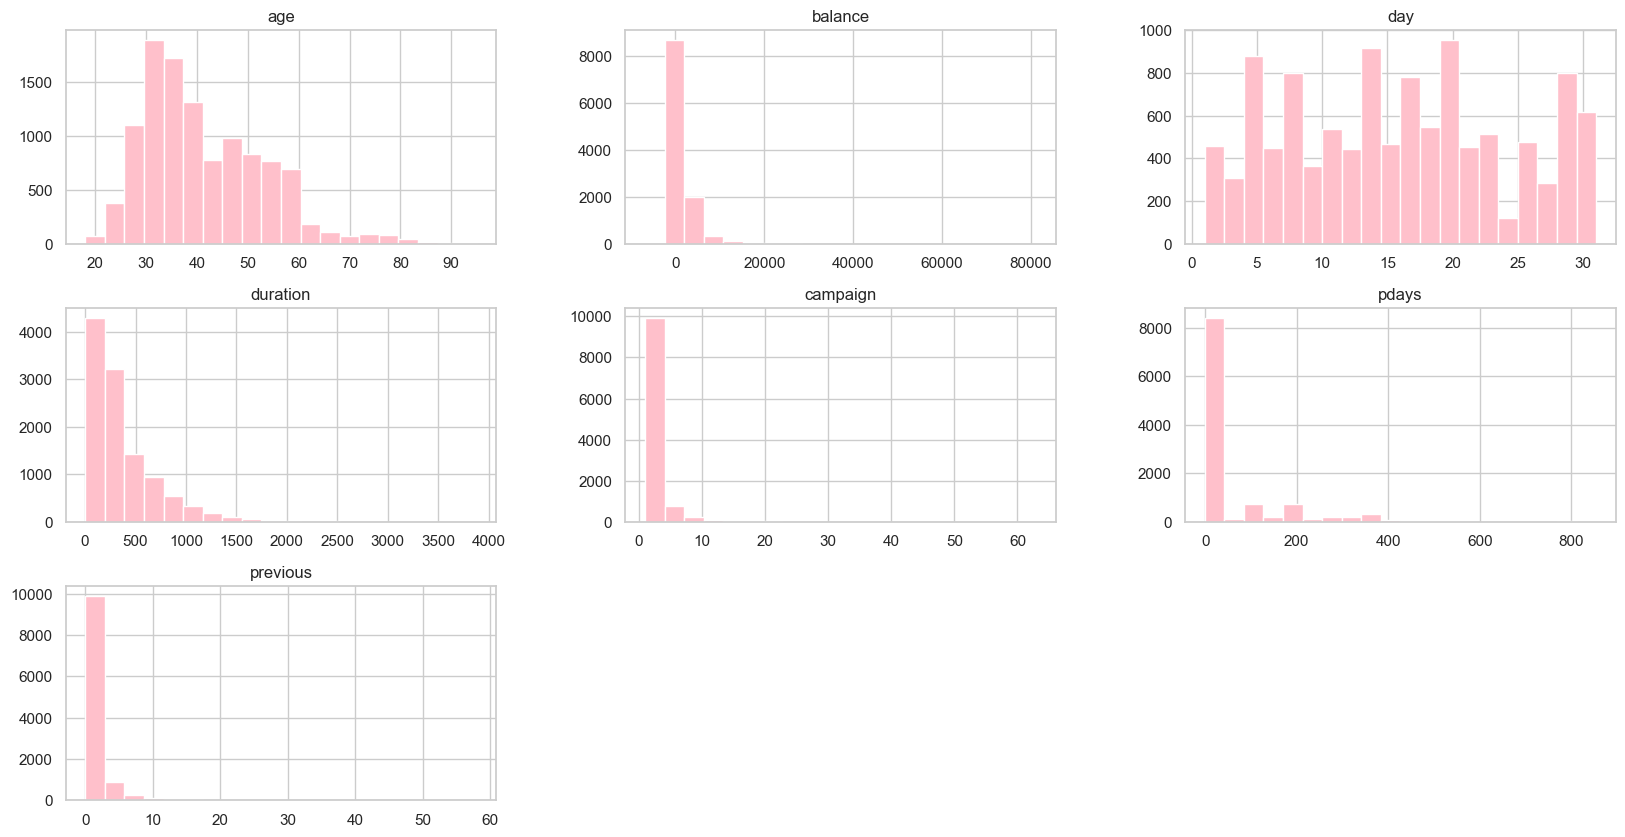

In [64]:
df.hist(bins=20, figsize=(20,10), color='pink')
plt.show()

Now let's plot some of categorical variables 

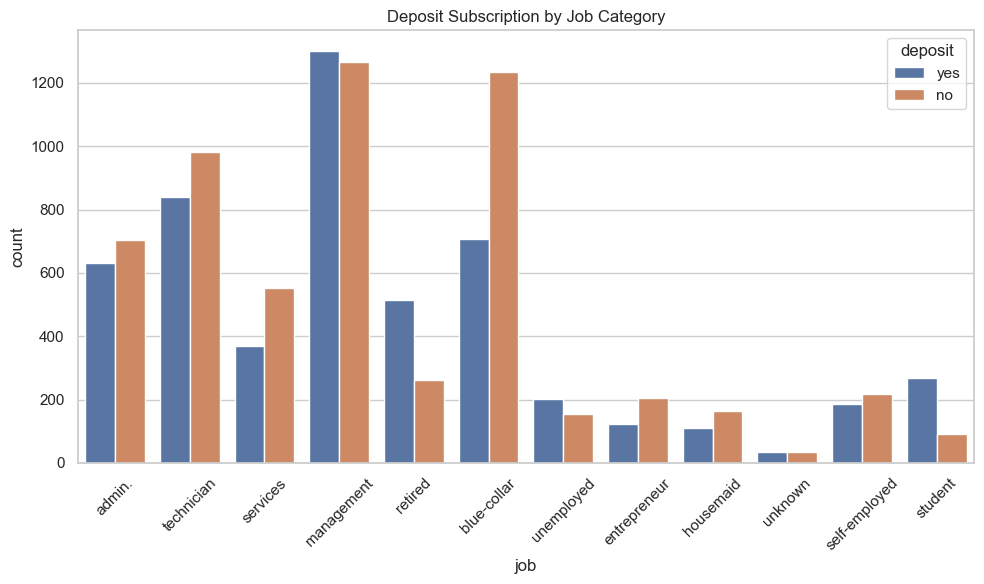

In [65]:
# Example for the 'job' category
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='deposit', data=df)
plt.title('Deposit Subscription by Job Category')
plt.xticks(rotation=45)
plt.tight_layout()

<Axes: xlabel='education', ylabel='balance'>

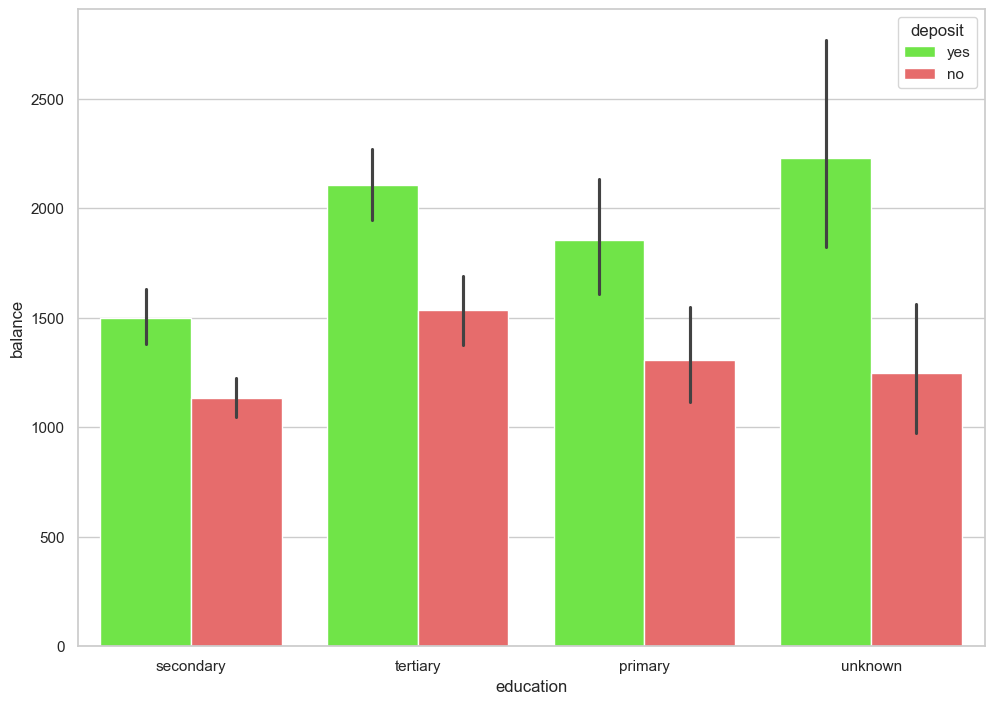

In [66]:
sns.barplot(x='education',y='balance',hue='deposit',palette=["#64FE2E", "#FA5858"], data=df)

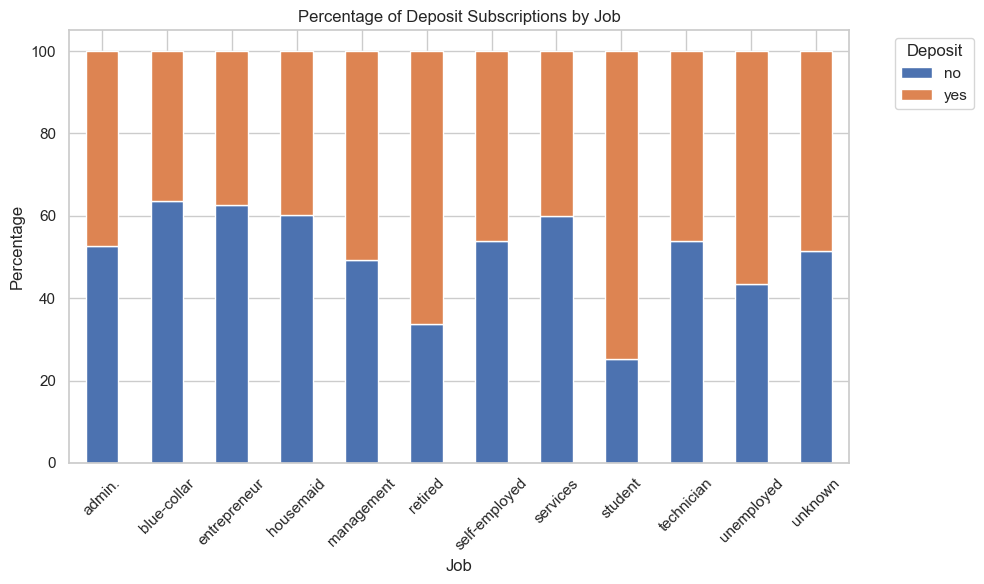

In [67]:
# Convert counts to percentages
job_deposit_counts = df.groupby(['job', 'deposit']).size().unstack(fill_value=0)
job_deposit_pct = job_deposit_counts.div(job_deposit_counts.sum(axis=1), axis=0) * 100

# Plot
job_deposit_pct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Deposit Subscriptions by Job')
plt.xlabel('Job')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Deposit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


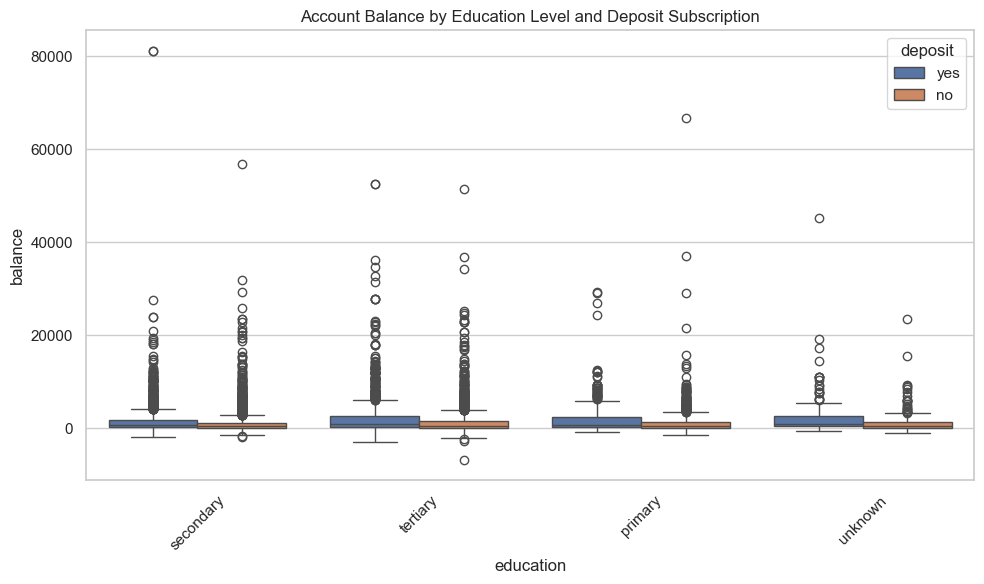

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='balance', hue='deposit', data=df)
plt.title('Account Balance by Education Level and Deposit Subscription')
plt.xticks(rotation=45)
plt.tight_layout()


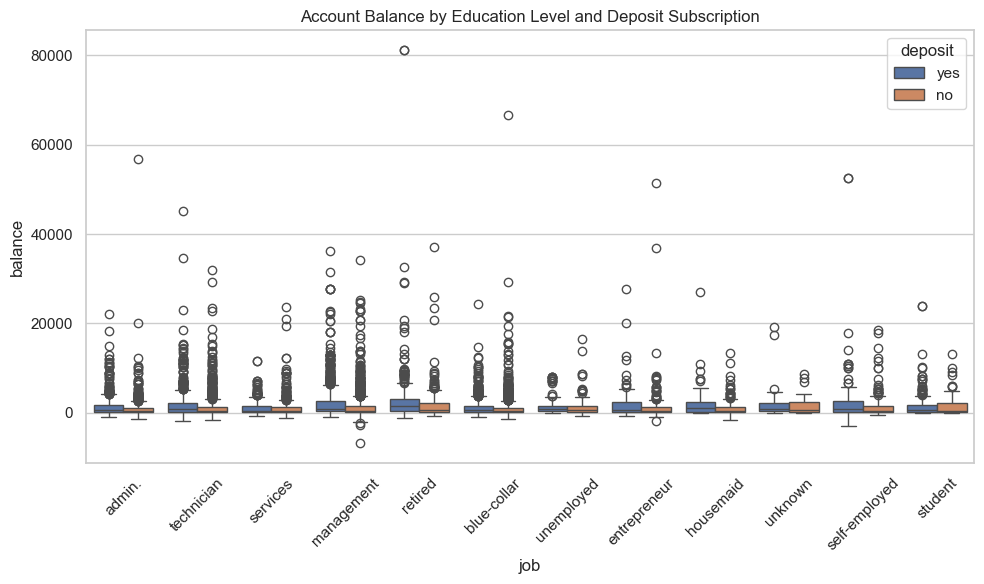

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='job', y='balance', hue='deposit', data=df)
plt.title('Account Balance by Education Level and Deposit Subscription')
plt.xticks(rotation=45)
plt.tight_layout()

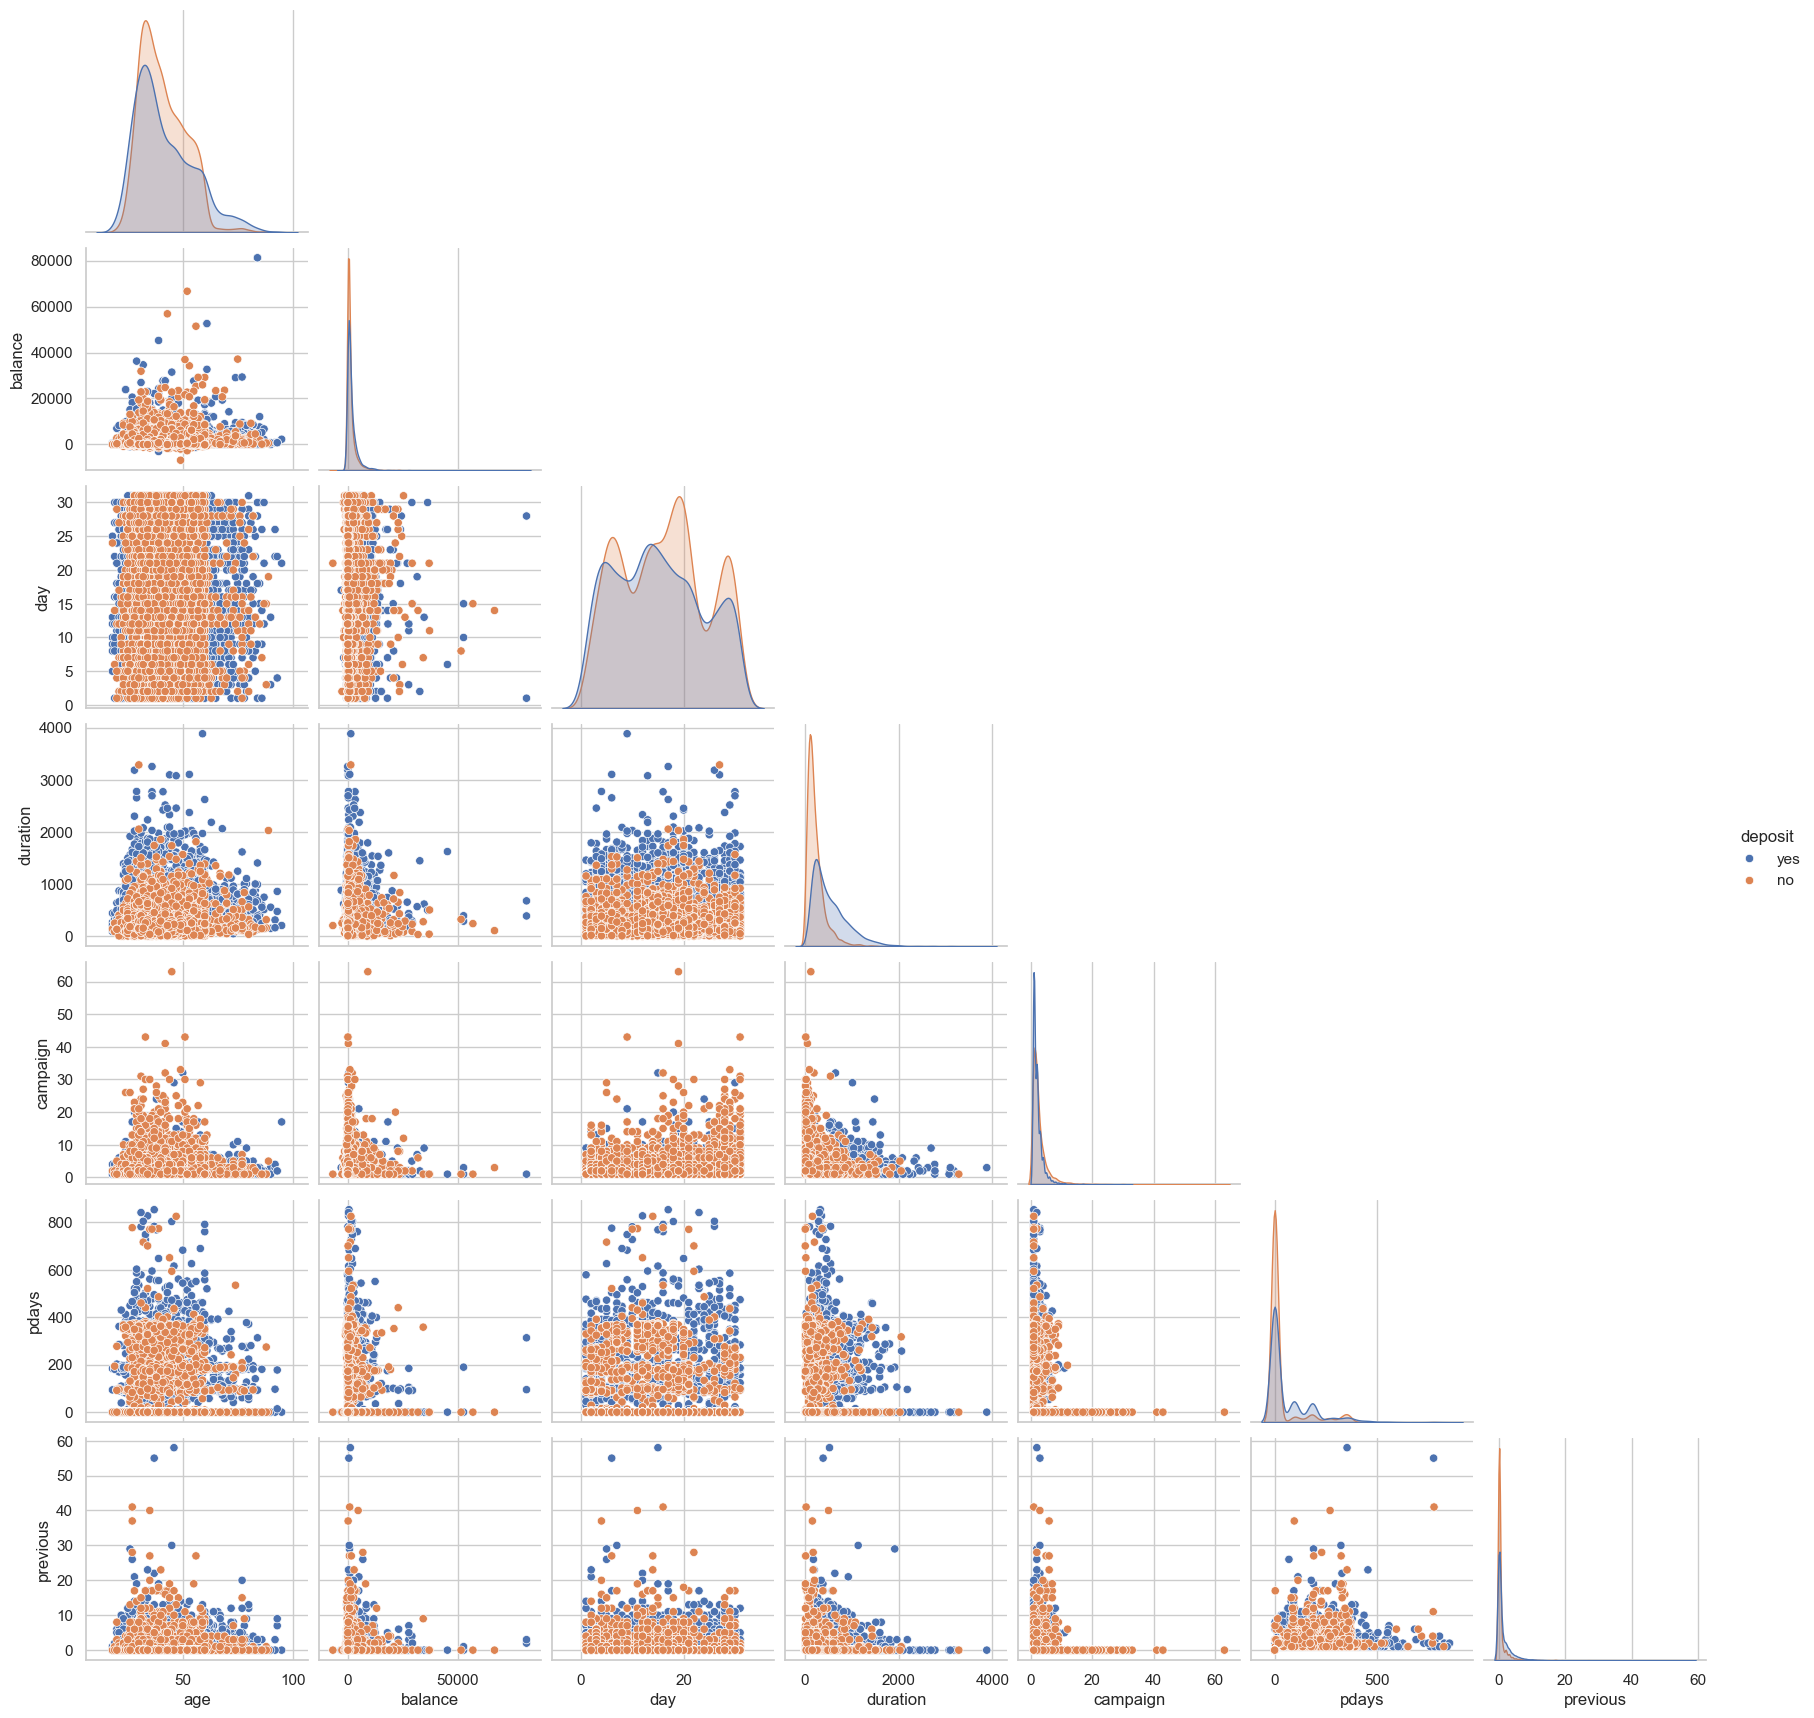

In [70]:
sns.pairplot(df,hue='deposit',corner=True)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'balance'),
  Text(0, 2.5, 'day'),
  Text(0, 3.5, 'duration'),
  Text(0, 4.5, 'campaign'),
  Text(0, 5.5, 'pdays'),
  Text(0, 6.5, 'previous')])

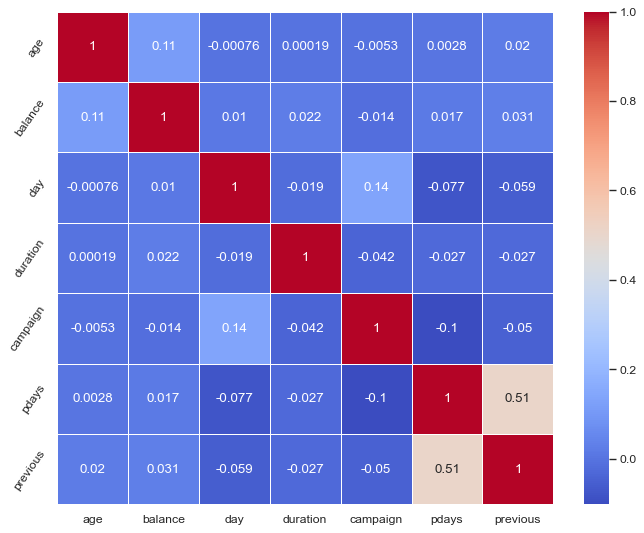

In [71]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(df.corr(numeric_only=True),cmap="coolwarm",annot=True,linewidth=0.5)
plt.yticks(rotation=55)

In [72]:
sample  = df.rename(columns={"balance":"Active Balance","job":"Occupation"})
fig = px.treemap(sample, path=[px.Constant('Active Balance'),'Occupation'], values='Active Balance',
                   hover_data=['Occupation'])
fig.show()

In [73]:
fig = px.scatter(df, x="balance", y="duration", color="marital", 
                 marginal_x="box", marginal_y="violin",
                  title="Click on the legend items!")
fig.update_layout(
    title={
         'text': "Purpose Of Low Amount Of Balance.",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    xaxis_title="Duration",
    yaxis_title=" Balance",
    legend_title="Marital Status",
    font=dict(
        family="Arial",
        size=20,
        color="DarkBlue"
    )
)
fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=False)
)
fig.show()


In [74]:
df['marital/education'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'

In [75]:
# Let's see the group who had loans from the marital/education group

loan_balance = df.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()


no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values
has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values


labels = loan_balance['marital/education'].unique().tolist()


trace0 = go.Scatter(
    x=no_loan,
    y=labels,
    mode='markers',
    name='No Loan',
    marker=dict(
        color='rgb(175,238,238)',
        line=dict(
            color='rgb(0,139,139)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=has_loan,
    y=labels,
    mode='markers',
    name='Has a Previous Loan',
    marker=dict(
        color='rgb(250,128,114)',
        line=dict(
            color='rgb(178,34,34)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title="The Impact of Loans to Married/Educational Clusters",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        showticklabels=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    width=1000,
    height=800,
    paper_bgcolor='rgb(255,250,250)',
    plot_bgcolor='rgb(255,255,255)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')


From this charts we can notice that our main age group is around 20/30 years old with relativly low account balance. People working in management are way more interested in deposit subscription than blue collar. A bit interesting fact is that workers with only primary education are paid better than after secondary education. Also students and retired ones seems to be the most interested in deposit subscription.

Now as suggested earlier let's drop duration column as it's highly correlated with outcome e.g., if duration=0 then y='no'. Yet, the duration is obviously not know before a call is performed

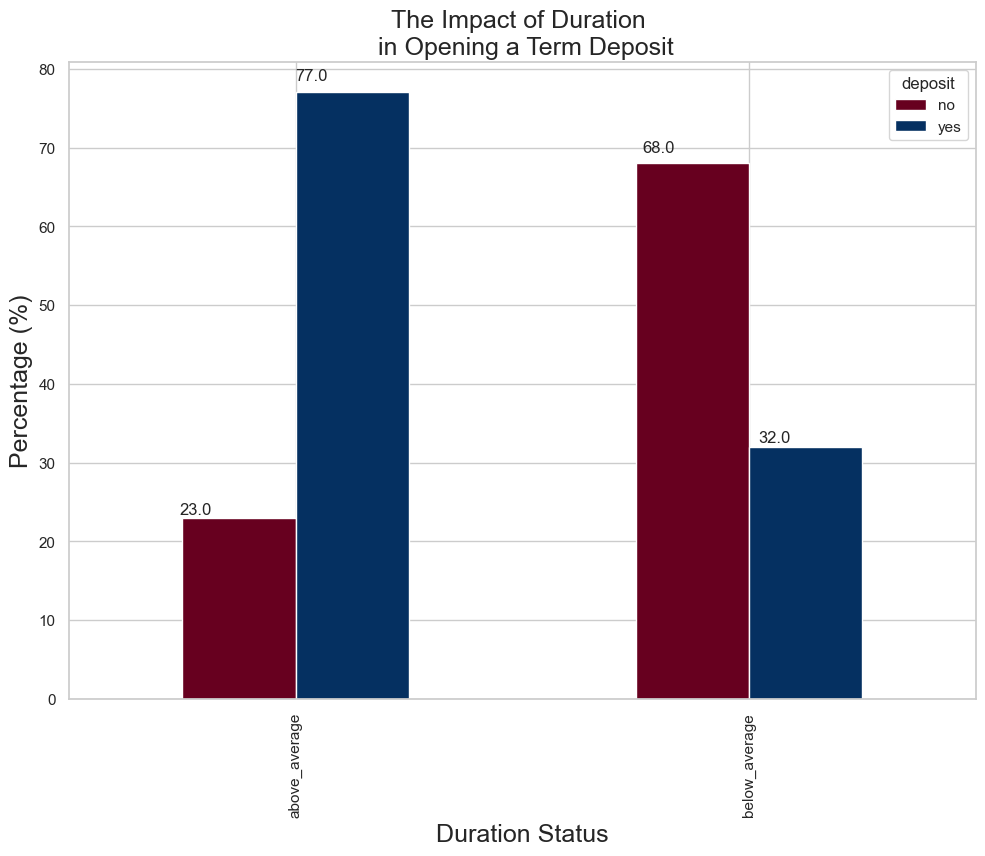

In [76]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

In [77]:
data = df.drop(columns=['duration','marital/education'])

In [78]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit,duration_status
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes,above_average
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes,above_average
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes,above_average
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes,above_average
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes,above_average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,-1,0,unknown,no,below_average
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,-1,0,unknown,no,below_average
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,-1,0,unknown,no,below_average
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,172,5,failure,no,below_average


And now let's plot just a deposit column to check are the data balanced

<Axes: xlabel='deposit', ylabel='count'>

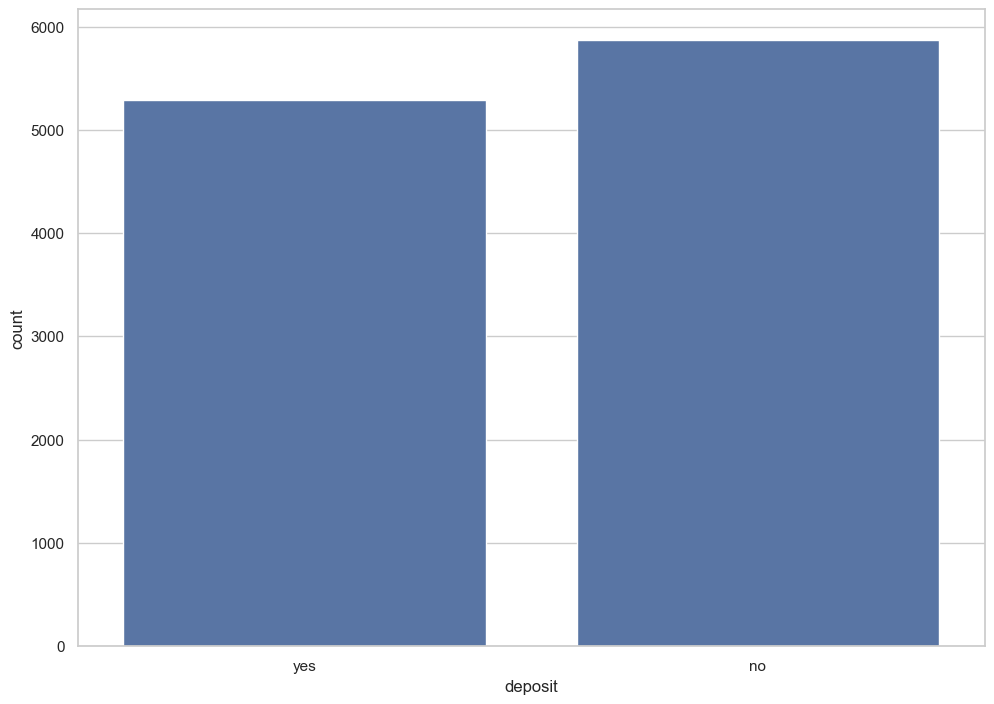

In [79]:
sns.countplot(data=data,x='deposit')


So now I think it's right time after looking and plotting all this fancy charts to begin creating some models. First step to be taken: preparing data. 


For my understanding features in this model we have to use 'dummy' encoding.This creates a binary column for
each category and returns a sparse matrix. Beacuse or all of categorical features(except month) can't be treated as nominal because they don't imply any order. Because when for example for occupation if we would keep everything in one col and for example encode managment as 1 and technican as 2. Algorithm would assume that technican is greater than managment and that obviously dosen't make any sense. 

In [80]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = [col for col in data.columns if data[col].dtype=="O"]
categorical_columns.remove('month')
encoding = pd.get_dummies(data[categorical_columns],dtype=int)
data = data.drop(labels = categorical_columns, axis = 1)
data = pd.concat([data,encoding],axis = 1 )



To deal with month column we will just write simple converter 

In [81]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [82]:
def month(kolumna):
    kolumna = kolumna.replace(to_replace={ 
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12}
    )
    return kolumna
    

In [85]:
data['month']=month(data['month'])

In [87]:
data

,age,balance,day,month,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes,duration_status_above_average,duration_status_below_average
0,59,2343,5,5,1,-1,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
1,56,45,5,5,1,-1,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,41,1270,5,5,1,-1,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
3,55,2476,5,5,1,-1,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
4,54,184,5,5,2,-1,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,4,1,-1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
11158,39,733,16,6,4,-1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
11159,32,29,19,8,2,-1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
11160,43,0,8,5,2,172,5,0,0,0,...,0,0,1,0,0,0,1,0,0,1
